# **Energy Consumption & CO2 Emissions Analysis**

## Project Overview

This notebook demonstrates the complete data analytics workflow for analysing global energy consumption patterns and their relationship with CO2 emissions. We'll explore data from multiple countries across different energy types (coal, natural gas, petroleum, nuclear, renewables) and examine their environmental impact.

## Objectives

1. Analyze global energy consumption patterns and CO2 emissions (1980-2020)
2. Investigate relationships between GDP, population, and energy consumption
3. Identify trends in renewable vs non-renewable energy adoption
4. Test hypotheses about economic and demographic factors affecting emissions
5. Build predictive models for energy consumption and emissions
6. Create an interactive dashboard for data exploration and insights

**AI Assistant Integration:**
Throughout this notebook, we'll use AI-powered insights to:
- Generate data quality reports
- Suggest optimal data cleaning strategies
- Provide contextual explanations of findings

## About Dataset

The world is becoming more modernized by the year, and with this becoming all the more polluted.

This data was pulled from the US Energy Administration and joined together for an easier analysis. Its a collection of some big factors that play into C02 Emissions, with everything from the Production and Consumption of each type of major energy source for each country and its pollution rating each year. It also includes each countries GDP, Population, Energy intensity per capita (person), and Energy intensity per GDP (per person GDP). All the data spans all the way from the 1980's to 2020. 

### Feature Descriptions:
* **Country** - Country in question
* **Energy_type** - Type of energy source
* **Year** - Year the data was recorded
* **Energy_consumption** - Amount of Consumption for the specific energy source, measured (quad Btu)
* **Energy_production** - Amount of Production for the specific energy source, measured (quad Btu)
* **GDP** - Countries GDP at purchasing power parities, measured (Billion 2015$ PPP)
* **Population** - Population of specific Country, measured (Mperson)
* **Energy_intensity_per_capita** - Energy intensity is a measure of the energy inefficiency of an economy. It is calculated as units of energy per unit of capita (capita = individual person), measured (MMBtu/person)
* **Energy_intensity_by_GDP**- Energy intensity is a measure of the energy inefficiency of an economy. It is calculated as units of energy per unit of GDP, measred (1000 Btu/2015$ GDP PPP)
* **CO2_emission** - The amount of C02 emitted, measured (MMtonnes CO2)

## Inputs

* Data source: https://www.kaggle.com/datasets/lobosi/c02-emission-by-countrys-grouth-and-population

## Outputs

* Cleaned dataset to use in the next step.

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'd:\\Code Institute\\Energy-Consumption-CO2-Emissions-Analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'd:\\Code Institute\\Energy-Consumption-CO2-Emissions-Analysis'

In [4]:
input_file_path = current_dir+'\\dataset\\raw\\energy.csv'
input_file_path

'd:\\Code Institute\\Energy-Consumption-CO2-Emissions-Analysis\\dataset\\raw\\energy.csv'

## Data Extraction

Import Packages

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Load the dataset

We'll load the energy consumption dataset from a CSV file. This dataset contains:
- Country information
- Energy type (coal, natural gas, petroleum, nuclear, renewables)
- Year (time series data)
- Energy consumption and production metrics
- GDP and population data
- Energy intensity per capita and by GDP
- CO2 emissions

In [6]:
# Load the dataset
df = pd.read_csv(input_file_path)
# Preview the first few rows
df

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547000,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547000,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547000,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547000,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
55435,55435,Zimbabwe,coal,2019,0.045064,0.075963,37.620400,1.465420e+04,11.508701,4.482962,4.586869
55436,55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000
55437,55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.620400,1.465420e+04,11.508701,4.482962,4.377890
55438,55438,Zimbabwe,nuclear,2019,NaN,NaN,37.620400,1.465420e+04,11.508701,4.482962,0.000000


---

## Initial Data Exploration

Let's understand the structure and characteristics of our dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55440 entries, 0 to 55439
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   55440 non-null  int64  
 1   Country                      55440 non-null  object 
 2   Energy_type                  55440 non-null  object 
 3   Year                         55440 non-null  int64  
 4   Energy_consumption           44287 non-null  float64
 5   Energy_production            44289 non-null  float64
 6   GDP                          40026 non-null  float64
 7   Population                   46014 non-null  float64
 8   Energy_intensity_per_capita  50358 non-null  float64
 9   Energy_intensity_by_GDP      50358 non-null  float64
 10  CO2_emission                 51614 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 4.7+ MB


Statistical summary

In [8]:
df.describe()

,Unnamed: 0,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
count,55440.000000,55440.0000,44287.000000,4.428900e+04,40026.000000,4.601400e+04,50358.000000,50358.000000,51614.000000
mean,27719.500000,1999.5000,1.537811,1.532700e+00,827.144126,6.263020e+04,71.898914,3.695104,78.800082
std,16004.293799,11.5435,15.456596,1.530356e+01,5981.703144,4.562088e+05,113.728738,4.590735,902.221463
min,0.000000,1980.0000,-0.163438,-1.000000e-39,0.124958,1.147100e+01,0.000000,0.000000,-0.005130
25%,13859.750000,1989.7500,0.000000,0.000000e+00,9.737780,1.141950e+03,3.799939,0.899446,0.000000
50%,27719.500000,1999.5000,0.018381,5.121971e-04,47.757100,6.157680e+03,29.779260,2.987593,0.000000
75%,41579.250000,2009.2500,0.209422,1.125410e-01,263.687100,2.004290e+04,95.523627,4.969454,4.318822
max,55439.000000,2019.0000,601.040490,6.115090e+02,127690.247059,7.714631e+06,1139.320598,166.913605,35584.933498


Check unique values in categorical columns

In [9]:
print(f"\nCountries: {df['Country'].nunique()}")
print(f"Energy Types: {df['Energy_type'].nunique()}")
print(f"Years: {df['Year'].min()} to {df['Year'].max()}")

print("\nEnergy Types:")
for energy_type in sorted(df['Energy_type'].unique()):
    count = len(df[df['Energy_type'] == energy_type])
    print(f"  - {energy_type}: {count:,} records")


Countries: 231
Energy Types: 6
Years: 1980 to 2019

Energy Types:
  - all_energy_types: 9,240 records
  - coal: 9,240 records
  - natural_gas: 9,240 records
  - nuclear: 9,240 records
  - petroleum_n_other_liquids: 9,240 records
  - renewables_n_other: 9,240 records


## Data Quality Assessment

Identify data quality issues including:
- Missing values
- Duplicate records
- Data type inconsistencies
- Outliers and anomalies

Check for missing values

In [10]:
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Percentage': missing_pct.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("✓ No missing values found!")

                     Column  Missing Count  Percentage
                        GDP          15414   27.803030
         Energy_consumption          11153   20.117244
          Energy_production          11151   20.113636
                 Population           9426   17.002165
Energy_intensity_per_capita           5082    9.166667
    Energy_intensity_by_GDP           5082    9.166667
               CO2_emission           3826    6.901154


Check for duplicate records

In [11]:
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")

if duplicates > 0:
    print("\nSample duplicate records:")
    print(df[df.duplicated(keep=False)].head(10))
else:
    print("✓ No duplicate records found!")

Total duplicate rows: 0
✓ No duplicate records found!


Check data types and convert if necessary

In [12]:
# Columns that should be numeric
numeric_cols = ['Energy_consumption', 'Energy_production', 'GDP', 'Population', 
                'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission']

print("\nConverting columns to appropriate data types...")
for col in numeric_cols:
    if col in df.columns:
        original_type = df[col].dtype
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"  - {col}: {original_type} → {df[col].dtype}")

print("\n✓ Data type conversion complete!")


Converting columns to appropriate data types...
  - Energy_consumption: float64 → float64
  - Energy_production: float64 → float64
  - GDP: float64 → float64
  - Population: float64 → float64
  - Energy_intensity_per_capita: float64 → float64
  - Energy_intensity_by_GDP: float64 → float64
  - CO2_emission: float64 → float64

✓ Data type conversion complete!


## 4. Data Cleaning

Based on our data quality assessment, we'll implement cleaning strategies:

### 4.1 Remove Aggregated Data

The dataset contains 'all_energy_types' which is a sum of all individual energy types. We'll remove these to avoid double-counting in our analysis.

In [13]:
# Remove 'all_energy_types' records
print(f"Records before: {len(df):,}")

df_clean = df[df['Energy_type'] != 'all_energy_types'].copy()

print(f"Records after: {len(df_clean):,}")
print(f"Records removed: {len(df) - len(df_clean):,}")

Records before: 55,440
Records after: 46,200
Records removed: 9,240


### Create Energy Categories

We'll map the raw energy types to standardized categories for easier analysis.

In [14]:
# Create Energy_category column with proper mapping
df_clean['Energy_category'] = df_clean['Energy_type'].apply(
    lambda x: (
        'coal' if str(x).lower() == 'coal' else
        'natural gas' if str(x).lower() == 'natural_gas' else
        'petroleum' if str(x).lower() == 'petroleum_n_other_liquids' else
        'nuclear' if str(x).lower() == 'nuclear' else
        'renewables' if str(x).lower() == 'renewables_n_other' else
        'Other'
    )
)

print("\nEnergy Category Distribution:")
print(df_clean['Energy_category'].value_counts())


Energy Category Distribution:
Energy_category
coal           9240
natural gas    9240
petroleum      9240
nuclear        9240
renewables     9240
Name: count, dtype: int64


### Handle Missing Values

Implement appropriate strategies for handling missing data based on the nature of each column.

In [15]:
# Check missing values after initial cleaning
missing_after = df_clean.isnull().sum()
missing_pct_after = (missing_after / len(df_clean)) * 100

missing_df_after = pd.DataFrame({
    'Column': missing_after.index,
    'Missing Count': missing_after.values,
    'Percentage': missing_pct_after.values
})
missing_df_after = missing_df_after[missing_df_after['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df_after) > 0:
    print(missing_df_after.to_string(index=False))
    
    # Fill missing values with 0 for energy-related metrics (assuming no data means no consumption/emission)
    print("\nFilling missing values with 0 for energy metrics...")
    energy_metrics = ['Energy_consumption', 'Energy_production', 'CO2_emission', 
                     'Energy_intensity_per_capita', 'Energy_intensity_by_GDP']
    for col in energy_metrics:
        if col in df_clean.columns:
            df_clean[col].fillna(0, inplace=True)
    
    print("✓ Missing values handled!")
else:
    print("✓ No missing values found!")

                     Column  Missing Count  Percentage
                        GDP          12845   27.803030
         Energy_consumption          10506   22.740260
          Energy_production          10504   22.735931
                 Population           7855   17.002165
Energy_intensity_per_capita           4235    9.166667
    Energy_intensity_by_GDP           4235    9.166667
               CO2_emission           2957    6.400433

Filling missing values with 0 for energy metrics...
✓ Missing values handled!


### Remove Outlier
Identify and handle extreme outliers that might skew our analysis.

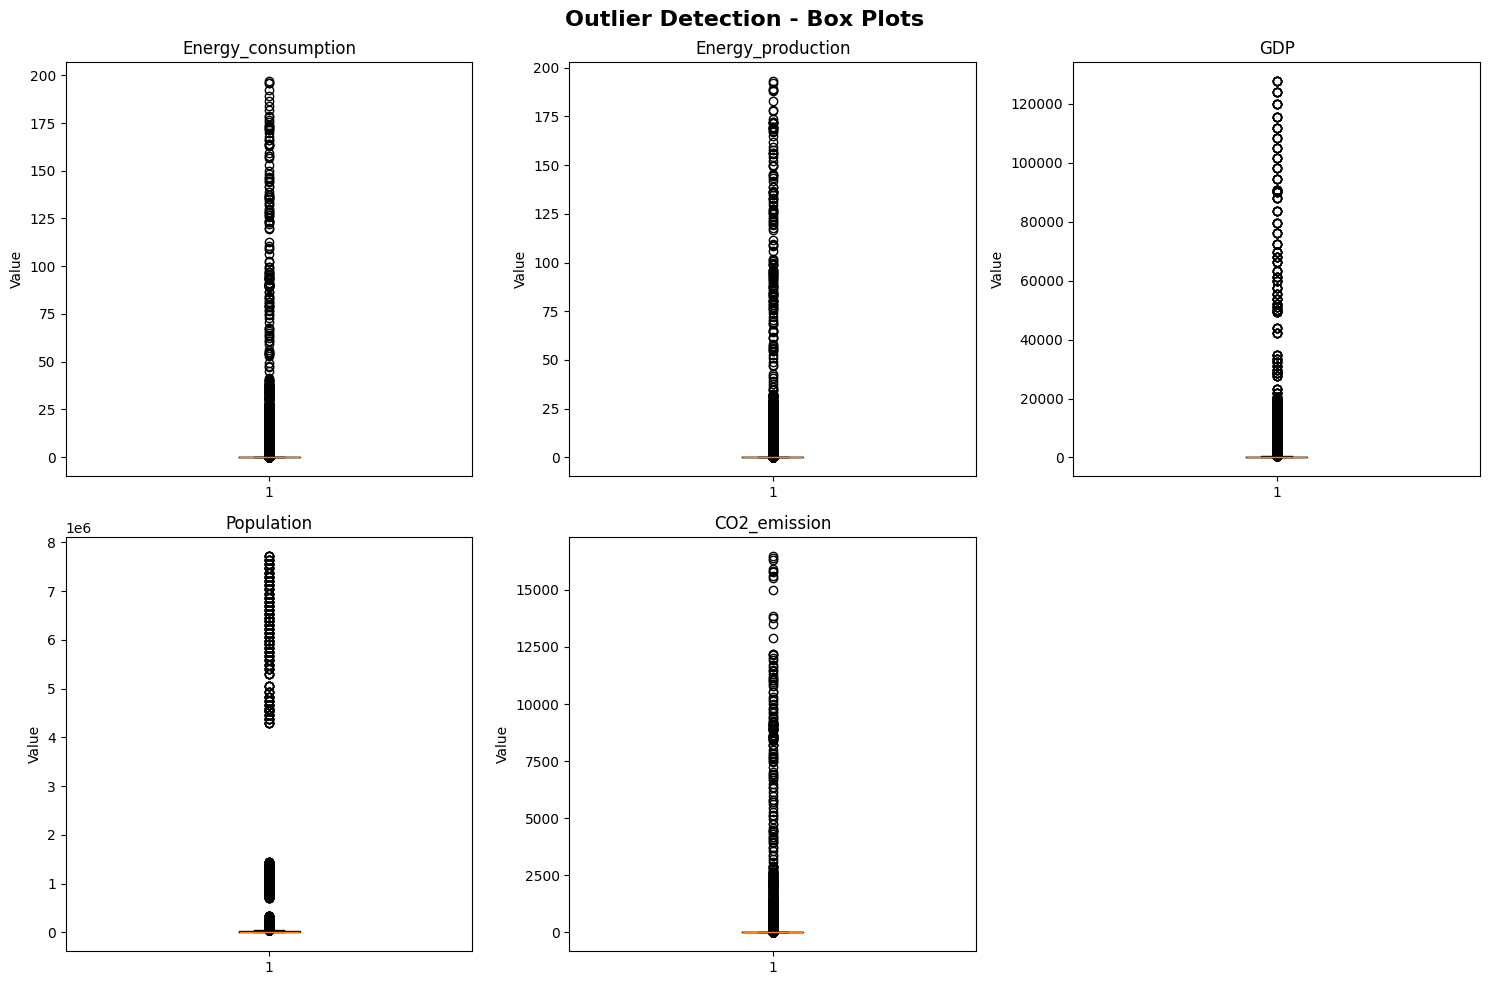

In [19]:
# Visualise outliers using box plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Outlier Detection - Box Plots', fontsize=16, fontweight='bold')

numeric_columns = ['Energy_consumption', 'Energy_production', 'GDP', 'Population', 'CO2_emission']

for idx, col in enumerate(numeric_columns):
    row = idx // 3
    col_idx = idx % 3
    
    axes[row, col_idx].boxplot(df_clean[col].dropna())
    axes[row, col_idx].set_title(col)
    axes[row, col_idx].set_ylabel('Value')

# Remove the extra subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.savefig('outlier_detection.png', dpi=300, bbox_inches='tight')
plt.show()

Note: Outliers are expected in this dataset due to:
  - Large countries (China, USA, India) vs small countries
  - Different economic development levels
  - We'll keep outliers as they represent real-world variations

## Feature Engineering

Create additional features that will be useful for analysis.

### 1. Energy balance (production - consumption)

In [20]:
df_clean['Energy_balance'] = df_clean['Energy_production'] - df_clean['Energy_consumption']

### 2. CO2 per capita

In [21]:
df_clean['CO2_per_capita'] = np.where(
    df_clean['Population'] > 0,
    df_clean['CO2_emission'] / df_clean['Population'],
    0
)

### 3. Energy efficiency (GDP per unit of energy)

In [22]:
df_clean['Energy_efficiency'] = np.where(
    df_clean['Energy_consumption'] > 0,
    df_clean['GDP'] / df_clean['Energy_consumption'],
    0
)

### 4. Decade grouping for trend analysis

In [23]:
df_clean['Decade'] = (df_clean['Year'] // 10) * 10

### 5. Energy type category (Fossil vs Renewable)

In [24]:
df_clean['Energy_source_type'] = df_clean['Energy_category'].apply(
    lambda x: 'Renewable' if x == 'renewables' else 
              'Nuclear' if x == 'nuclear' else 
              'Fossil Fuel'
)


## Final Dataset Summary

Let's review our cleaned and enhanced dataset.

In [25]:
# Display final dataset information
print(f"Total records: {len(df_clean):,}")
print(f"Total columns: {len(df_clean.columns)}")
print(f"Memory usage: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nColumn List:")
for i, col in enumerate(df_clean.columns, 1):
    print(f"{i:2d}. {col:30s} ({df_clean[col].dtype})")

df_clean.head(10)

Total records: 46,200
Total columns: 17
Memory usage: 15.36 MB

Column List:
 1. Unnamed: 0                     (int64)
 2. Country                        (object)
 3. Energy_type                    (object)
 4. Year                           (int64)
 5. Energy_consumption             (float64)
 6. Energy_production              (float64)
 7. GDP                            (float64)
 8. Population                     (float64)
 9. Energy_intensity_per_capita    (float64)
10. Energy_intensity_by_GDP        (float64)
11. CO2_emission                   (float64)
12. Energy_category                (object)
13. Energy_balance                 (float64)
14. CO2_per_capita                 (float64)
15. Energy_efficiency              (float64)
16. Decade                         (int64)
17. Energy_source_type             (object)


,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,Energy_category,Energy_balance,CO2_per_capita,Energy_efficiency,Decade,Energy_source_type
1,1,World,coal,1980,78.656,80.114,27770.910,4298126.522,68.146,10.547,1409.790,coal,1.458,0.000,353.067,1980,Fossil Fuel
2,2,World,natural_gas,1980,53.865,54.761,27770.910,4298126.522,68.146,10.547,1081.593,natural gas,0.896,0.000,515.563,1980,Fossil Fuel
3,3,World,petroleum_n_other_liquids,1980,132.064,133.111,27770.910,4298126.522,68.146,10.547,2455.244,petroleum,1.047,0.001,210.284,1980,Fossil Fuel
4,4,World,nuclear,1980,7.576,7.576,27770.910,4298126.522,68.146,10.547,0.000,nuclear,0.000,0.000,3665.788,1980,Nuclear
5,5,World,renewables_n_other,1980,20.702,20.775,27770.910,4298126.522,68.146,10.547,0.000,renewables,0.073,0.000,1341.438,1980,Renewable
7,7,Afghanistan,coal,1980,0.002,0.002,NaN,13356.500,1.990,0.000,0.000,coal,-0.000,0.000,NaN,1980,Fossil Fuel
8,8,Afghanistan,natural_gas,1980,0.002,0.063,NaN,13356.500,1.990,0.000,0.000,natural gas,0.061,0.000,NaN,1980,Fossil Fuel
9,9,Afghanistan,petroleum_n_other_liquids,1980,0.015,0.000,NaN,13356.500,1.990,0.000,0.000,petroleum,-0.015,0.000,NaN,1980,Fossil Fuel
10,10,Afghanistan,nuclear,1980,0.000,0.000,NaN,13356.500,1.990,0.000,0.000,nuclear,0.000,0.000,0.000,1980,Nuclear
11,11,Afghanistan,renewables_n_other,1980,0.007,0.007,NaN,13356.500,1.990,0.000,0.000,renewables,0.000,0.000,NaN,1980,Renewable


## Save Cleaned Dataset

Export the cleaned dataset for use in subsequent analysis notebooks.

In [26]:
# Save the cleaned data to a new CSV file

processed_file_path = current_dir+'\\dataset\\processed\\cleaned_energy_data.csv'
df_clean.to_csv(processed_file_path, index=False)